#**Min Edit Distance Tutorial(Ungraded Activity)**

**Instructions:**

---

* This is tutorial file where you can use this as reference to complete your assignmnet-1 and learn more techniques of MED and this is an ungraded activity file

#**Min Edit Distance**


Given two strings str1 and str2 of length M and N respectively and below operations that can be performed on str1. Find the minimum number of edits (operations) to convert ‘str1‘ into ‘str2‘.

    Operation 1 (INSERT): Insert any character before or after any index of str1
    Operation 2 (REMOVE): Remove a character of str1
    Operation 3 (Replace): Replace a character at any index of str1 with some other character.
    
  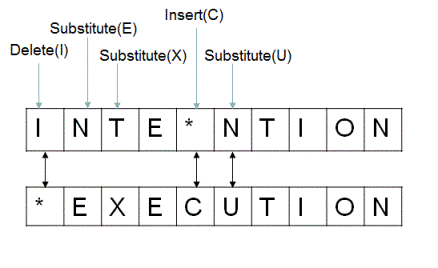

##**Method-1: Using Recursion**
The approach involves processing characters from the end of both strings, considering two scenarios for each character pair: a match or a mismatch. If the last characters match, no operation is needed, and we recursively evaluate the remaining string. For mismatches, we explore all three operations—insertion, replacement, and deletion—to align the last characters, recursively finding the minimum cost for the rest of the string. The final step is to choose the operation with the lowest cost.

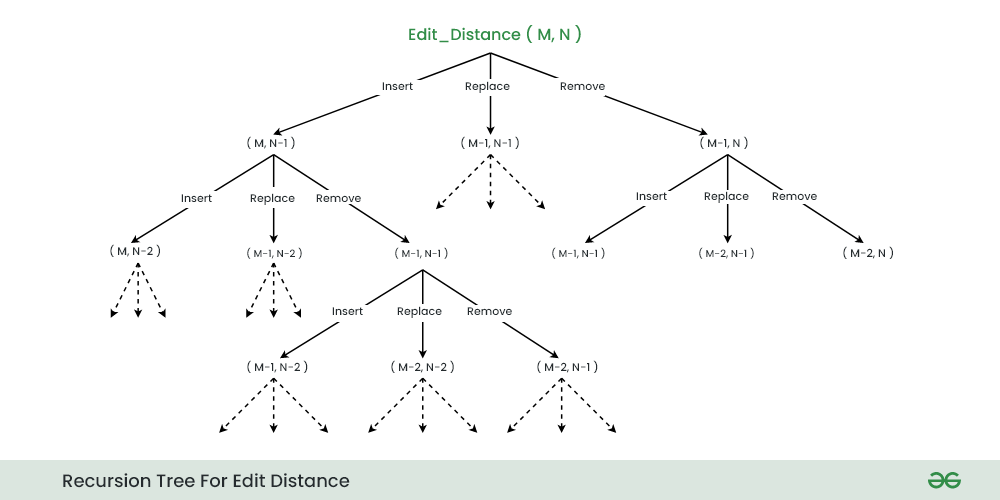

Recurrence Relations for Edit Distance:

        EditDistance(str1, str2, M, N) = EditDistance(str1, str2, M-1, N-1)
        Case 1: When the last character of both the strings are same
        Case 2: When the last characters are different
            EditDistance(str1, str2, M, N) = 1 + Minimum{ EditDistance(str1, str2 ,M-1,N-1), EditDistance(str1, str2 ,M,N-1), EditDistance(str1, str2 ,M-1,N) }

Base Case for Edit Distance:

        Case 1: When str1 becomes empty i.e. M=0
            return N, as it require N characters to convert an empty string to str1 of size N
        Case 2: When str2 becomes empty i.e. N=0
            return M, as it require M characters to convert an empty string to str2 of size M

##**Method 2: Using Dynamic Programming Memoization**
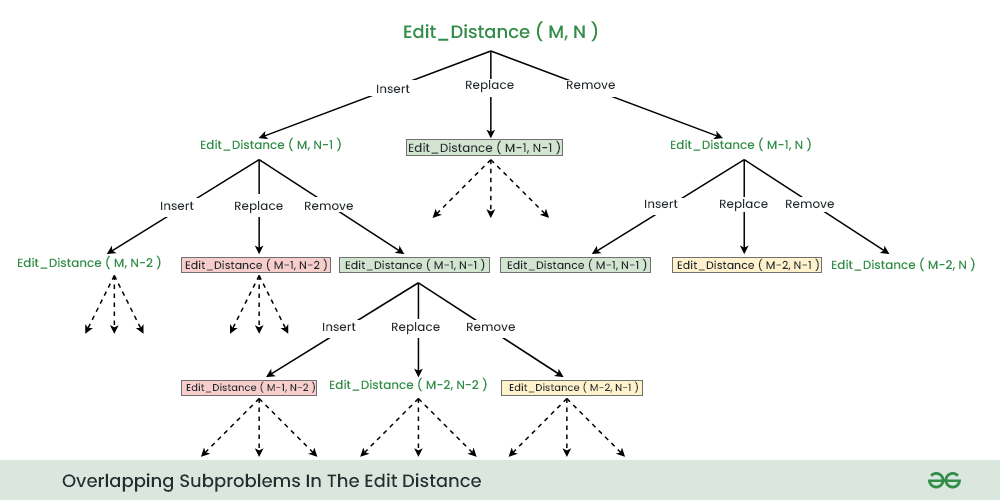



In [ ]:
def minDis(s1, s2, n, m, dp):

	# If any string is empty,
	# return the remaining characters of other string
	if(n == 0):
		return m
	if(m == 0):
		return n

	# To check if the recursive tree
	# for given n & m has already been executed
	if(dp[n][m] != -1):
		return dp[n][m]

	# If characters are equal, execute
	# recursive function for n-1, m-1
	if(s1[n - 1] == s2[m - 1]):
		if(dp[n - 1][m - 1] == -1):
			dp[n][m] = minDis(s1, s2, n - 1, m - 1, dp)
			return dp[n][m]
		else:
			dp[n][m] = dp[n - 1][m - 1]
			return dp[n][m]

	# If characters are nt equal, we need to
	# find the minimum cost out of all 3 operations.
	else:
		if(dp[n - 1][m] != -1):
			m1 = dp[n - 1][m]
		else:
			m1 = minDis(s1, s2, n - 1, m, dp)

		if(dp[n][m - 1] != -1):
			m2 = dp[n][m - 1]
		else:
			m2 = minDis(s1, s2, n, m - 1, dp)
		if(dp[n - 1][m - 1] != -1):
			m3 = dp[n - 1][m - 1]
		else:
			m3 = minDis(s1, s2, n - 1, m - 1, dp)

		dp[n][m] = 1 + min(m1, min(m2, m3))
		return dp[n][m]


		# Driver code
str1 = "saturday"
str2 = "sunday"

n = len(str1)
m = len(str2)
dp = [[-1 for i in range(m + 1)] for j in range(n + 1)]

print(minDis(str1, str2, n, m, dp))

3


##**Method 3: Using DP Bottom-Up Approach**

**Dimension Selection for the Table**: To accommodate the solutions of smaller sub-problems arising from the recursive calls, which decrement either m or n, a 2D table dp[][] is essential for storing these sub-problem solutions.

**Determining the Table Size**: The 2D table's dimensions are directly tied to the count of unique sub-problems, calculated as (m + 1) * (n + 1). This is because both m and n decrease to zero through recursive steps, leading to m + 1 and n + 1 potential states for the first and second parameters, respectively, resulting in (m + 1) * (n + 1) possible sub-problems.

**Populating the Table**: This involves two key steps—initializing the table and then iteratively solving for larger problems based on smaller sub-problems:

**Table Initialization**: Set up the table's base case by initializing the first column dp[i][0] to i and the first row dp[0][j] to j, reflecting the base cases where m = 0 or n = 0.

**Iterative Solution Construction**: Translate the recursive formula into an iterative process to fill in the table:
        When the characters match (str1[i – 1] == str2[j – 1]), set dp[i][j] = dp[i – 1][j – 1].
        For mismatched characters (str1[i – 1] != str2[j – 1]), set dp[i][j] = 1 + min(dp[i][j – 1], dp[i – 1][j], dp[i – 1][j – 1]).

**Extracting the Final Solution**: The fully populated table's bottom-right cell, dp[m][n], contains the final solution, representing the minimum edit distance between the two strings.

In [ ]:
# A Dynamic Programming based Python program for edit
# distance problem


def editDistDP(str1, str2, m, n):
	# Create a table to store results of subproblems
	dp = [[0 for x in range(n + 1)] for x in range(m + 1)]

	# Fill d[][] in bottom up manner
	for i in range(m + 1):
		for j in range(n + 1):

			# If first string is empty, only option is to
			# insert all characters of second string
			if i == 0:
				dp[i][j] = j # Min. operations = j

			# If second string is empty, only option is to
			# remove all characters of second string
			elif j == 0:
				dp[i][j] = i # Min. operations = i

			# If last characters are same, ignore last char
			# and recur for remaining string
			elif str1[i-1] == str2[j-1]:
				dp[i][j] = dp[i-1][j-1]

			# If last character are different, consider all
			# possibilities and find minimum
			else:
				dp[i][j] = 1 + min(dp[i][j-1],	 # Insert
								dp[i-1][j],	 # Remove
								dp[i-1][j-1]) # Replace

	return dp[m][n]


# Driver code
str1 = "sunday"
str2 = "saturday"

print(editDistDP(str1, str2, len(str1), len(str2)))
# This code is contributed by Bhavya Jain


3


#**MED APPLICATIONS**

##**1. Spell Checker**


In [ ]:
from nltk.corpus import words
import nltk
nltk.download('words')

english_vocab = set(w.lower() for w in words.words())
input_word = "cadr"

def min_edit_distance_word(input_word, vocabulary):
    from nltk.metrics.distance import edit_distance

    min_distance = float('inf')
    closest_match = None

    for word in vocabulary:
        distance = edit_distance(input_word, word)
        if distance < min_distance:
            min_distance = distance
            closest_match = word

    return closest_match

suggestion = min_edit_distance_word(input_word, english_vocab)
print(f"Did you mean: {suggestion}?")


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Did you mean: cader?


##**2: Autocorrect**

In [ ]:
!pip install symspellpy

from symspellpy import SymSpell, Verbosity
import pkg_resources

# Initialize symspell dictionary
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")

# Load dictionary and bigram dictionary
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

def autocorrect_sentence(sentence):
    """
    Corrects the sentence using SymSpell.
    """
    # Get suggestions for multi-word input (supports splitting & merging)
    suggestions = sym_spell.lookup_compound(sentence, max_edit_distance=2)

    # Join the suggestions to form the corrected sentence
    corrected_sentence = " ".join([suggestion.term for suggestion in suggestions])
    return corrected_sentence

# Example usage
input_sentence = "This is a tset sentnce with smoe speling errors."
corrected_sentence = autocorrect_sentence(input_sentence)
print(f"Original: {input_sentence}")
print(f"Corrected: {corrected_sentence}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.3-cp310-cp310-linux_x86_64.whl size=187457 sha256=feecc77d4873307008d50014cb4301b7022cdd579d277f90047f8dcf70ff155b
  Stored in directory: /root/.cache/pip/wheels/88/6a/a6/a1283cc145323a1fb3d475bd158ee60b248ab1985230d266fc
Successfully built editdistpy
Original: This is a tset sentnce with smoe speling errors.
Corrected: this is a set sentence with some spelling errors


##**3: DNA Sequence Alignment**


In [ ]:
def dna_sequence_alignment(seq1, seq2):
    m, n = len(seq1), len(seq2)
    # Create a DP table to store results of subproblems
    dp = [[0 for x in range(n+1)] for y in range(m+1)]

    # Initialize DP table for base case
    for i in range(m+1):
        dp[i][0] = i
    for j in range(n+1):
        dp[0][j] = j

    # Fill dp[][] in bottom up manner
    for i in range(1, m+1):
        for j in range(1, n+1):
            if seq1[i-1] == seq2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j],    # Insertion
                                   dp[i][j-1],    # Deletion
                                   dp[i-1][j-1])  # Substitution

    # Reconstructing the alignment
    align1, align2 = "", ""
    i, j = m, n
    while i > 0 and j > 0:
        if seq1[i-1] == seq2[j-1]:
            align1 = seq1[i-1] + align1
            align2 = seq2[j-1] + align2
            i -= 1
            j -= 1
        elif dp[i][j] == dp[i-1][j-1] + 1:
            align1 = seq1[i-1] + align1
            align2 = seq2[j-1] + align2
            i -= 1
            j -= 1
        elif dp[i][j] == dp[i-1][j] + 1:
            align1 = seq1[i-1] + align1
            align2 = "-" + align2
            i -= 1
        else:
            align1 = "-" + align1
            align2 = seq2[j-1] + align2
            j -= 1

    # For remaining characters in sequences
    while i > 0:
        align1 = seq1[i-1] + align1
        align2 = "-" + align2
        i -= 1
    while j > 0:
        align1 = "-" + align1
        align2 = seq2[j-1] + align2
        j -= 1

    return dp[m][n], align1, align2

# Example DNA sequences
seq1 = "GATTACA"
seq2 = "GCATGCU"
min_distance, alignment1, alignment2 = dna_sequence_alignment(seq1, seq2)
print(f"Minimum Edit Distance: {min_distance}")
print(f"Alignment 1: {alignment1}")
print(f"Alignment 2: {alignment2}")


Minimum Edit Distance: 4
Alignment 1: GATTACA
Alignment 2: GCATGCU



##Backtrace for computing alignment
In natural language processing (NLP), alignment refers to the process of finding correspondences between elements of text. This can be useful in a variety of applications, including machine translation and information retrieval.

Backtrace is a common algorithm used for computing alignments between sequences of text. The basic idea behind backtrace is to work backwards from the end of the sequences, identifying the best alignment between each pair of characters or words.

Here's a step-by-step overview of how backtrace works for computing alignment in NLP:

Input: Given two sequences of text to be aligned, sequence A and sequence B.

Initialization: Create a matrix with dimensions (length of A + 1) x (length of B + 1). Each cell in the matrix will represent the cost of aligning a character or word from sequence A with a character or word from sequence B. The first row and first column are initialized with 0s.

Fill the matrix: For each cell in the matrix (excluding the first row and first column), calculate the cost of aligning the corresponding characters or words from sequence A and sequence B. The cost can be based on various factors, such as the similarity of the characters or words, or the distance between them in a semantic space. Once the cost is calculated, set the value of the cell to the cost.

Backtrace: Starting from the bottom-right corner of the matrix, find the optimal path to the top-left corner. This can be done by following the path with the lowest cost, and making diagonal, vertical, or horizontal moves. As you traverse the path, record the alignments between the characters or words in sequence A and sequence B.

Output: The final output of the backtrace algorithm is the optimal alignment between the two sequences, as well as the cost of the alignment.

Backtrace is a dynamic programming algorithm that can be used to efficiently compute alignments between sequences of any length. However, the cost function used in step 3 can greatly affect the quality of the alignment, so choosing an appropriate cost function is important for achieving good results.

Example  

In [ ]:
# A Python program to find optimal alignment between sequences A="AGTC" AND B="AGTC" using the cost function
#For a match, the cost is 0.
#For a mismatch, the cost is 1
#For an insertion or deletion, the cost is 2.
def backtrace_alignment(A, B):
    m = len(A)
    n = len(B)
    cost = [[0 for j in range(n+1)] for i in range(m+1)]
    for i in range(1, m+1):
        cost[i][0] = cost[i-1][0] + 2
    for j in range(1, n+1):
        cost[0][j] = cost[0][j-1] + 2
    for i in range(1, m+1):
        for j in range(1, n+1):
            if A[i-1] == B[j-1]:
                cost[i][j] = cost[i-1][j-1]
            else:
                cost[i][j] = min(cost[i-1][j-1] + 1, cost[i-1][j] + 2, cost[i][j-1] + 2)
    align_A = ""
    align_B = ""
    i = m
    j = n
    while i > 0 or j > 0:
        if i > 0 and j > 0 and A[i-1] == B[j-1]:
            align_A = A[i-1] + align_A
            align_B = B[j-1] + align_B
            i -= 1
            j -= 1
        elif i > 0 and cost[i][j] == cost[i-1][j] + 2:
            align_A = A[i-1] + align_A
            align_B = "-" + align_B
            i -= 1
        else:
            align_A = "-" + align_A
            align_B = B[j-1] + align_B
            j -= 1
    return align_A, align_B, cost[m][n]

A = "ACGTC"
B = "AGTC"

align_A, align_B, cost = backtrace_alignment(A, B)
print("Sequence A: ", align_A)
print("Sequence B: ", align_B)
print("Alignment Cost: ", cost)


Sequence A:  ACGTC
Sequence B:  A-GTC
Alignment Cost:  2


Here we are defining a backtracing alignment function by the name "backtrace_alignment" which takes 2 insput sequences and outputs the cost of allignment and the alligned sequences.
First, we create a mxn zero matrix with m and n as the lengths of both sequences respectively.Then we update the cost of first row and first column with appropriate costs. Then update the remaining cells with minimum of the calculated costs.


# Needleman Wunsch alignment

## Flavors of Sequence Alignment: Global vs. Local Alignment

Sequence alignment comes in several different flavors or varieties:

**Global sequence alignment** assumes two sequences are homologous (or share a common evolutionary ancestor) across their whole length. It tries to line up the whole thing, from tail to snout. This might be a reasonable assumption for two genes in the same gene family, for instance.

**Local sequence alignment** assumes that there are regions of homology within a bigger sequence, but also regions that do not share common ancestry. This might be a reasonable assumption if checking how many genes two species share. If the species aren't extremely closely related, we would expect that they would share certain genes, but also that there should be large portions of the genome that do not share detectable evolutionary ancestry between the two species (due to large insertions, deletions, inversions or rearrangements).

Alignment methods can also be **pairwise** methods, in which two sequences are aligned or **multiple sequence alignments** in which many sequences are aligned together (e.g. all the amino-acyl tRNA synthetase genes in mammals).

In this chapter we will focus first on global alignment. However, once you understand global alignment in detail, the algorithm for local alignment is similar enough that you can understand that as well, with just a little extra effort.

In **pairwise global sequence alignment** we begin with two sequences. These can be DNA, RNA or amino acid sequences. For simplicity, let's focus at first on pairwise global alignment of DNA sequences.

We'll assume that the full length of our two sequences are homologous, but may contain *insertions* or *deletions* of nucleotides that have caused the homologous positions not to line up with each other. Therefore, our goal is to 'align' or line up these homologous positions in the sequences by adding '-' characters to certain places in each sequence.  These '-' characters will represent places where the two nucleotide sequences become offset from one another (and therefore stop lining up) due to either an extra nucleotide inserted into one, or a nucleotide deleted from the other.

Here's an example. Let's start with two unaligned DNA sequences: `AAAATATTGG` and `TCCTATGG`. If we try to compare sequence identity between these sequences without alignment, we won't see a high level of sequence similarity:

`AAAATATTGG` <br>
`TCCTATGG`

Indeed, if you compare the nulceotides that line up, you'll see that *none* of them match. If we wanted to formalize this, we could calculate the Hamming Distance between the two sequences (just 1 - the fraction of matching items), and we would find a distance of 1.0.

Yet it is probably clear that the sequences have many similarities. If we upload these sequences to a pairwise global alignment web tool (like the EMBOSS one at [EBI](https://www.ebi.ac.uk/Tools/services/web/toolresult.ebi?jobId=emboss_needle-I20201212-184827-0832-96343451-p1m)), we might get a result that looks something like this:

`EMBOSS_001         1 AAAATAT----TGG     10
                           |    |||
EMBOSS_001         1 ------TCCTATGG      8`

From a pairswise alignment alone, we can't distinguish whether '-' characters represent insertion in the sequence without the '-' or deletion in the sequence with the '-'. For this reason '-' characters are called *gaps* or *indels* (short for *in*sertion **or** *del*etion).

#### Understanding the Needleman-Wunsch algorithm

Before we write code to accomplish a task, it's critical that we understand exactly what we are trying to do. For most algorithms, that means it is extremely important that we work a couple examples by hand before we try to code them. This might seem like extra work, but in fact saves **a ton** of time in the long run.

Therefore, before we try to write code to do Needleman-Wunsch alignment, we're going to practice doing it by hand. Don't worry - after the first row or two it will become clear - even obvious - how to do the algorithm.

> **Coding tip for complex code:** If you take the time to really experiment with each python data structure and understand how it works, and take the time to do an algorithm by hand so you understand how it works, and if you build your code step by step in small pieces that you can check as you go, then even very complex algorithms become much easier to put together.

#### Performing the Needleman-Wunsch algorithm by hand

Grab a piece of paper and a pen. We're going to read the Needleman-Wunsch algorithm description and implement it for a simple example on paper.

##### Settle on a scoring scheme
First, we need to settle on a scoring scheme that is based on how much we want to penalize insertion of indels ('-') vs. substitions (e.g. A --> G). We can choose to score all substitutions equally, or assign a different score to some substitutions (e.g. to reflect that biologically transitions are much more common than transversions). Generally, the more common insertions or deletions are biologically, the lower the gap penalty should be. Similarly, the more common substitutions are, the lower the substitution penalty should be. For simplicity in this example, we will use a very simple scoring scheme:

- *Gap penalty* = -1
- *Match bonus (all matches)* = 1
- *Mismatch penalty (all substitutions)* = -1


###### Draw a table representing possible alignments
Next, we need to draw two tables in which the nucleotides of sequence 1 are on the left side (i.e. they are the row labels) and the nucleotides of sequence 2 are on the top (i.e. they are the column labels). The first will be our 'score matrix' where we keep track of the best possible way to get to the point where each pair of nucletides line up. The second will be our traceback matrix, where we record the set of steps that got us to that optimal score. One trick is that we will have an extra gap ('-') character before each sequence (so the number of rows be one more than the length of sequence 1, and the number of columns will be one more than the length of sequence 2. At the end we will be able to walk back through the traceback matrix to get our optimal alignment.

Here's an example of how the scoring matrix might look at the start of the algorithm:



<img src="https://drive.google.com/uc?export=view&id=1IcgvloBPiE6FPeWKQwOaIeI6KZVZ7GO0" width="400" align="center"  description="The image shows a table formed from the DNA sequence G C A T G C T on the x-axis (each column corresponds to one letter) and the sequence G A T T A C A on the y-axis. There is one extra blank row or column before each sequence. At this step, the table is blank. The two sequences are rainbow colored, with each nucleotide being a different color.">

#### Intuition behind the layout of the scoring matrix

One key insight of the Needleman-Wunsch alignment is that all the possible alignments of two sequences from left to right can be represented on this table as paths between the upper left of the table and the lower right of the table.

**Meaning of diagonal moves.** If we start in the upper left corner and proceed digonally down the table, that represents an alignment in which we only use *substitutions* (mutations that change one nucleotide into another) to explain the differences between the two sequences.

In our specific example, this would mean an alignment that looks like this:

`1 GCATGCT     7
   |  |
 1 GATTACA     7
`<br>
This is a pretty bad alignment (only 2 matches and 5 mismatches). We'll improve on it in a moment, but can you see how the row/column labels you would encounter if you go from top left to bottom right in the table correspond to this alignment? If not, it may be worth trying it by hand step-by-step: the first cell you'd enter in the top left would have a G in both the row and the column. That represents the match between the G's in the top and bottom sequence in the alignment above. The next step would have a C in the column but an A in the row. That would represent the mismatch between C and A in the second position of the alignment. Mistmatches like this indicate that during evolution either the ancestor was a C and one sequence had a C --> A substitution in the bottom sequence, or the ancestor was an A and there was an A--> C substitution in the top sequence.


More generally, any diagonal move we make in heading from the start to the end of the sequence means we are asserting that two nucleotides are homologous (share the same evolutionary origin) and are 'the same thing'. This type of move will improve the alignment score if the nucleotides are the same, but make it worse if they are different.

**Meaning of moves to the right**
Let's say after starting in the upper-left of the table we took one step to the right, *and then* proceeded as before to travel diagonally down the table. What would that mean for our alignment? If you try this with your finger on the table above, you'll see that the first cell you reach has column label G and now row label. This would indicate that the first G in our first sequence is paired with nothing ('-') in our second sequence. Biologically, this would indicate that the ancestral sequence either had a G and it was lost in the bottom sequence (a deletion) or that the G was added by mutation into the top sequence (an insertion). Now move your finger down and to the right. The next cell you encounter is no longer a pairing of G with G (as before) but now a pairing of the first G in the bottom sequence with the C in position 2 of the top sequence. Effectively, all our other pairings will be 'offset' by 1 due to the insertion in the left sequence.  This will change which positions look like matches vs. mismatches. The alignment corresponding to this 'horizontal 1 then diagonal' path would look like this:

`1 GCATGCT-     8
      |
 1 -GATTACA     8
`

**Meaning of moves down**

Just as moves to the right insert indel ('-') characters into the left (rows) sequence, moves down insert indel characters into the top (columns) sequence.

> Needleman-Wunsch alignment represents all possible alignments of two sequences using a table. Any set of right, down or diagonal down and to the right moves represents a possible alignment of the two sequences. Diagonal paths represent matches or mismatches. Moves to the right insert an indel character into the second (rows) sequence, while moves down insert an indel character into the first (columns) sequence. Any move right or down changes which nucleotides match or mismatch in subsequent diagonal moves.




## Step 2. Score  the first cell

We will now fill in scores in the first row, working from left to right, following a couple of simple rules. Let's start with the first cell, with the G's on the columns and rows. We'll talk in depth about the rules for how to score this cell, then you can practice it on later cells.

#### Calculate scores for the 3 possible moves that can lead to this cell

For each cell we need to calculate 3 values, representing the 3 possible moves (down, right, or diagonal) that can get us to the current cell, to figure out which has the highest score and therefore the best path through the alignment to this spot. Let's do this one by one for the first cell.

First let's calculate the score to get to the cell using a **down** move. This score will be equal to the score in the cell above plus the gap penalty. So for our first cell, the score above is -1, and the gap penalty is -1. So if we got to this spot by a down move (inserting an indel into the left sequence), the score would be -2.

A move **to the right** also represents insertion of an indel. If our top left position was reached by such a move, it would have a score of -1 (the score in the cell to the left of our current cell) + the gap penalty of -1. So it would have a score of -2.

Finally, the score could have been produced by a move **diagonally down** (representing a match between the two G's). The scoring for diagonal moves is to begin with the score diagonally above, then add the match bonus (here +1) if the two nucleotides in the row and column for that position match, or the mismatch penalty (here -1) for those two nucleotides if they don't match. In this case they do match, so the score for this move is 0 (the score of the cell above and to the left) + the match bonus of 1 = 1.

###### Record the best scoring move
Finally, we take the highest of these 3 scores and put it into the cell. This represents the best way that previous nucleotides in the two sequences could be aligned up to the current spot of the alignment - in other words the best path to this spot. We also draw an arrow to represent the direction of the best scoring move (here diagonal down). This can either be recorded in another table that is a copy of this one, or you can just draw the arrows into the corners of the cells like I've done below.

>**The score of each cell in a Needleman Wunsch scoring matrix** is the *maximum score* produced by either:
>Reaching it with a down move: score of cell above + gap penalty
>Reacing it with a move to the right: score of cell to the left + gap penalty
>Reacing it with a diagonal move: score of the cell above and to the left of this cell, + either the match bonus (if the row and column nucleotides match) or the mismatch penalty (if they don't).


**What this result means**: In this case, the best score is produced by a diagonal (match or mismatch) move that matches the two G's for a score of 1. Biologically and intuitively this makes sense: if two sequences start with a G, a reasonable first step is to line up those G's.



<img src="https://drive.google.com/uc?export=view&id=1lr58kzQ1IBAPMkOv0f0av-Ah_F-c7Ntw" width="400" align="center"  description="The image shows a table formed from the DNA sequence G C A T G C T on the x-axis (each column corresponds to one letter) and the sequence G A T T A C A on the y-axis. There is one extra blank row or column before each sequence. The 1st row below the top sequence has numbers 0, -1, -2 up through -7 in the cells. The first column before the 2nd sequence also has the numbers 0, -1, -2, through -7 (from top to bottom) in the cells. The cell immediately diagonally down from the top left is marked '1'.">

### Step 3. Repeat for the rest of the cells in the table

Repeat the process from Step 2 above to score all the other cells in the table. Here's how that would look after the first row (I've omitted all the arrows to make the table a little less dense):


<img src="https://drive.google.com/uc?export=view&id=1prhH4SEThXOVmAO0k2s8sB-IGkLoYxEi" width="400" align="center"  description="The image shows a table formed from the DNA sequence G C A T G C T on the x-axis (each column corresponds to one letter) and the sequence G A T T A C A on the y-axis. There is one extra blank row or column before each sequence. The 1st row below the top sequence has numbers 0, -1, -2 up through -7 in the cells. The first column before the 2nd sequence also has the numbers 0, -1, -2, through -7 (from top to bottom) in the cells.">

### Step 4. Trace back through the matrix to find the optimal alignment

Finally, start in the lower right of the alignment. Step to the cell that has the highest score and is either above, to the left or diagonal up and to the left of the current cell. Each time you step diagonally, record a match or mismatch between the row & diagonal sequences.

Whenever you move up, record an indel in the left sequence. Whenever you move right, record an indel in the top sequence. If you move diagonally, record each nucleotide in it's respective sequence.

So for the first move (a diagonal), we'd record:

`
T
A
`

Since these are the nucleotides in the lower left.

After completing the full traceback, we would finally we would arrive at:

`
GCAT-GCT
| ||
G-ATTACA
`


https://drive.google.com/file/d/1xaIsO4qTYPZLL55g8qWQUZ6CNV-mJrDt/view?usp=sharing

<img src="https://drive.google.com/uc?export=view&id=1xaIsO4qTYPZLL55g8qWQUZ6CNV-mJrDt" width="400" align="center"  description="The image shows a table formed from the DNA sequence G C A T G C T on the x-axis (each column corresponds to one letter) and the sequence G A T T A C A on the y-axis. There is one extra blank row or column before each sequence. The 1st row below the top sequence has numbers 0, -1, -2 up through -7 in the cells. The first column before the 2nd sequence also has the numbers 0, -1, -2, through -7 (from top to bottom) in the cells.">


## Implementing Needleman-Wunsch global alignment in python.

Implementing Needleman-Wunsch alignment by hand is a fairly complex task, with several components. Therefore, to get it right, we have to be gentle on ourselves by breaking it up into many smaller tasks. That way we won't get overwhelmed by the overall algorithm and can just focus on ensuring that each piece works.

##### Setting up the scoring and traceback arrays

When we did the algorithm by hand, our first step was to draw some tables. In python we will instead use numpy arrays. So our first task is to make two arrays that will represent our tables: one that is an array of numbers (for the scores) and one that is an array of strings (for the arrows).


In [ ]:
from numpy import full

#build an array of zeroes
seq1 = "GCATGCT"
seq2 = "GATACCA"

n_rows = len("-"+seq1)
n_columns = len("-"+seq2)

scoring_array = full([n_rows,n_columns],0)
print("Scoring array:\n",scoring_array)

traceback_array = full([n_rows,n_columns],"-")
print("Traceback array:\n",traceback_array)

Scoring array:
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
Traceback array:
 [['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']]


Here we are starting to implement the needleman wunsh algorithm by importing the required packages. First we import Full from numpy package.Then we assign the rows and columns to lengths of given 2 sequencies.then we implement the scoring and traceback array using full() function with 0 and "-" respectively.

## Making the scoring array easier to read

To make the scoring array easier to read, we can write a quick function to turn it into an HTML table. It isn't very important to understand this function. I show it for completeness, but it's mostly just to make the rest output prettier results that are easier to follow.

Basically, we're creating a new pandas DataFrame object from our 2d array, and setting the sequences as its row and column names. Pandas DataFrames already have a built in `to_html` function that turns them into pretty HTML output. So we just call that function, and then show the result using IPython's HTML function.

(And no, I did not just magically know or remember all this! Despite having done this before, I absolutely had to google how to do this from [StackOverflow](https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output)).

In [ ]:
from IPython.core.display import HTML,display
import pandas as pd

def pretty_table_from_array(data_array, row_labels,col_labels):
    """Show an HTML table from a 2d numpy array"""
    df = pd.DataFrame(data_array,index=row_labels,columns=col_labels)
    table_html = df.to_html()
    return HTML(table_html)

Here we are simply defining a function to display the output in a html table which will be used further.

In [ ]:

row_labels = [label for label in "-"+seq1]
column_labels = [label for label in "-"+seq2]

print("Scoring array:")
display(pretty_table_from_array(scoring_array,row_labels,column_labels))
print("Traceback array:")
display(pretty_table_from_array(traceback_array,row_labels,column_labels))

Scoring array:


,-,G,A,T,A,C,C,A
-,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0
T,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0
T,0,0,0,0,0,0,0,0


Traceback array:


,-,G,A,T,A,C,C,A
-,-,-,-,-,-,-,-,-
G,-,-,-,-,-,-,-,-
C,-,-,-,-,-,-,-,-
A,-,-,-,-,-,-,-,-
T,-,-,-,-,-,-,-,-
G,-,-,-,-,-,-,-,-
C,-,-,-,-,-,-,-,-
T,-,-,-,-,-,-,-,-


Here we are indicating the labels for rows and columns and then printing the scoring array and traceback arrays using the above defined pretty_table_from_array.

### How to iterate over our array using nested for loops

Before we try to write actual alignment code, let's make sure we're comfortable iterating over the cells of our array. Basically this means setting up code that lets us visit each cell in the array one by one - like running our finger along a table to read each row one by one from top to bottom.

To visit a cell in the table, we need it's *index*, which is the row and column number for that cell. So to visit all the cells, our main challenge is to generate each row and column number one by one. To do this we will set up an outer `for` loop that iterates over each row one by one, setting each row number to a variable (here I call this variable `row_index`, but `i` is most commonly used in real code). Within each loop over the row numbers, an inner `for` loop iterates over each column number one by one and sets its value to a variable (here I use `col_index`, but `j` is most typically used in real code). Inside both loops, we will have a value for the current row and column number. We can use these to index into the scoring array using array indexing (`scoring_array[row_index,column_index]`).

In the short code snippet below, let's practice this setup, and use it to number each cell of the array by the order in which we visit it. This can help show us visually what order our code is visiting the cells of our array.

In [ ]:
count = 0
for row_index in range(n_rows):
    for col_index in range(n_columns):
        scoring_array[row_index,col_index] = count
        count += 1

display(pretty_table_from_array(scoring_array,row_labels,column_labels))

,-,G,A,T,A,C,C,A
-,0,1,2,3,4,5,6,7
G,8,9,10,11,12,13,14,15
C,16,17,18,19,20,21,22,23
A,24,25,26,27,28,29,30,31
T,32,33,34,35,36,37,38,39
G,40,41,42,43,44,45,46,47
C,48,49,50,51,52,53,54,55
T,56,57,58,59,60,61,62,63


Here we are updating the above generated table with the count. This helps us find how the algorithm travels or visits the sequence.

Because our `for` loop iterating over rows is on the outside, we first visit the 0th row, then the inner loop triggers and we visit each column in that row (cells marked 0-7)
Then we visit the next row, and the process repeats (cells marked 8-15). The loops continue until we hit the bottom of the array (cell marked 63).
Note that even though there are 8 rows and 8 columns, the number in the final cell (63) is one less than 8x8 = 64 because we are counting from zero.

**Stop for a moment and try swapping the order of the for loops** (so the line `for col_index in range(n_columns)` comes first). Now rerun the code. How does this affect the order in which the cells are visited?



#### How to draw pretty Unicode arrows for use in the traceback array

Eventually we will need to be able to *trace back* the path we took through the scoring array. To do this we will use special unicode characters to draw pretty arrows representing our steps.

Note that such unicode symbols can also be used to type Braille characters, etc.
Official documentation on Unicode symbols is available [here](http://www.unicode.org/charts/#symbols).

[This](http://xahlee.info/comp/unicode_index.html) searchable gallery may also be of interest.                                                         
           
In python 3, special Unicode charcters can be accessed with \u (for Unicode) and then the number of that character in the Unicode system (which you look up from one of the resources above).

Before we use them in anything fancy, let's try accessing Unicode and printing them out.


In [ ]:
up_arrow = "\u2191"
right_arrow = "\u2192"
down_arrow = "\u2193"
left_arrow = "\u2190"
down_right_arrow = "\u2198"
up_left_arrow = "\u2196"

print("Up arrow",up_arrow)
print("Left arrow",left_arrow)
print("Up Left arrow",up_left_arrow)


Up arrow ↑
Left arrow ←
Up Left arrow ↖


Here we are just defining the types of arrows we will be using further.

#### Implementing the Needleman-Wunsch algorithm

Now that we know how to iterate over the cells of an array, we can begin to implement the Needleman-Wunsch algorithm to fill in the scoring array.

When we first calculate our scoring matrix, we can also keep track in a second identically shaped matrix of the directions we have moved. This extra bookkeeping will prevent us from having to re-infer all this information at the end of the process.

In [ ]:
#build an array of zeroes
n_rows = len(seq1) + 1 #need an extra row up top
n_columns = len(seq2) + 1 #need an extra column on the left
row_labels = [label for label in "-"+seq1]
column_labels = [label for label in "-"+seq2]


scoring_array = full([n_rows,n_columns],0)
traceback_array = full([n_rows,n_columns],"-")


#Define Unicode arrows we'll use in the traceback array
up_arrow = "\u2191"
right_arrow = "\u2192"
down_arrow = "\u2193"
left_arrow = "\u2190"
down_right_arrow = "\u2198"
up_left_arrow = "\u2196"

arrow = "-"
gap_penalty = -1
match_bonus = 1
mismatch_penalty = -1
#iterate over columns first because we want to do
# all the columns for row 1 before row 2
for row in range(n_rows):
    for col in range(n_columns):
        if row == 0 and col == 0:
            #We're in the upper right corner
            score = 0
            arrow = "-"
        elif row == 0:
            #We're on the first row
            #but NOT in the corner

            #Look up the score of the previous cell (to the left) in the score array\
            previous_score = scoring_array[row,col - 1]
            # add the gap penalty to it's score
            score = previous_score + gap_penalty
            arrow = left_arrow
        elif col == 0:
            #We're on the first column but not in the first row
            previous_score = scoring_array[row -1,col]
            score = previous_score + gap_penalty
            arrow = up_arrow
        else:
            #We're in a 'middle' cell of the alignment

            #Calculate the scores for coming from above,
            #from the left, (representing an insertion into seq1)
            cell_to_the_left = scoring_array[row,col-1]
            from_left_score = cell_to_the_left + gap_penalty

            #or from above (representing an insertion into seq2)
            above_cell = scoring_array[row-1,col]
            from_above_score = above_cell + gap_penalty

            #diagonal cell, representing a substitution (e.g. A --> T)
            diagonal_left_cell = scoring_array[row-1,col-1]

            #NOTE: since the table has an extra row and column (the blank ones),
            #when indexing back to the sequence we want row -1 and col - 1.
            #since row 1 represents character 0 of the sequence.
            if seq1[row-1] == seq2[col-1]:
                diagonal_left_cell_score = diagonal_left_cell + match_bonus
            else:
                diagonal_left_cell_score = diagonal_left_cell + mismatch_penalty

            score = max([from_left_score,from_above_score,diagonal_left_cell_score])
            #take the max

            #make note of which cell was the max in the traceback array
            #using Unicode arrows
            if score == from_left_score:
                arrow = left_arrow
            elif score == from_above_score:
                arrow = up_arrow
            elif score == diagonal_left_cell_score:
                arrow = up_left_arrow

        traceback_array[row,col]=arrow
        scoring_array[row,col] = score

display(pretty_table_from_array(scoring_array,row_labels,column_labels))
display(pretty_table_from_array(traceback_array,row_labels,column_labels))

,-,G,A,T,A,C,C,A
-,0,-1,-2,-3,-4,-5,-6,-7
G,-1,1,0,-1,-2,-3,-4,-5
C,-2,0,0,-1,-2,-1,-2,-3
A,-3,-1,1,0,0,-1,-2,-1
T,-4,-2,0,2,1,0,-1,-2
G,-5,-3,-1,1,1,0,-1,-2
C,-6,-4,-2,0,0,2,1,0
T,-7,-5,-3,-1,-1,1,1,0


,-,G,A,T,A,C,C,A
-,-,←,←,←,←,←,←,←
G,↑,↖,←,←,←,←,←,←
C,↑,↑,↖,←,←,↖,←,←
A,↑,↑,↖,←,↖,←,←,↖
T,↑,↑,↑,↖,←,←,←,←
G,↑,↑,↑,↑,↖,←,←,←
C,↑,↑,↑,↑,↑,↖,←,←
T,↑,↑,↑,↑,↑,↑,↖,←


Here we are performing the needleman wunsh process on the given sequences. where based on the match or mismatch, score will be calculated from adding the respective score to the maximum of the adjacent scores. then we uodate the traceback matrix with relevant arrows.

#### Tracing back along the scoring matrix to find an optimal alignment

Our traceback step is going to be a little bit tricky because there can be more than one optial path.

If we ignore this complication for a moment, our algorithm might look something like this:

- start in the bottom right
- find whether the cell to the left, above or above and to the left of the current cell has the highest value
- move to that cell
- adjust the alignment of seq1 and seq2 based on the move.
- continue moving until we reach 0,0

This would work, except that some cells will be tied in value. This can happen anytime there are two or more equally good alignments of our sequences. Therefore, we have to do something more like this:

- create an empty list of branches
- start in the bottom right cell
- for each branch:
    - find whether the cell to the left, above or above and to the left of the current cell has the highest value
    - if there's a tie, pick one value to pursue, and add the others as additional branches.
    - move to that cell
    - adjust the alignment of seq1 and seq2 based on the move.
    - continue moving until we reach 0,0

In [ ]:
def traceback_alignment(traceback_array,seq1,seq2,up_arrow = "\u2191" ,\
                        left_arrow="\u2190",up_left_arrow="\u2196",stop="-"):
    """Align seq1 and seq2 using the traceback matrix and return as two strings

    traceback_array -- a numpy array with arrow characters indicating the direction from
    which the best path to a given alignment position originated

    seq1 - a sequence represented as a string
    seq2 - a sequence represented as a string
    up_arrow - the unicode used for the up arrows (there are several arrow symbols in Unicode)
    left_arrow - the unicode used for the left arrows
    up_left_arrow - the unicode used for the diagonal arrows
    stop - the symbol used in the upper left to indicate the end of the alignment
    """

    n_rows = len(seq1) + 1 #need an extra row up top
    n_columns = len(seq2) + 1 #need an extra row up top

    row = len(seq1)
    col = len(seq2)
    arrow = traceback_array[row,col]
    aligned_seq1 = ""
    aligned_seq2 = ""
    alignment_indicator = ""
    while arrow is not "-":
            print("Currently on row:",row)
            print("Currently on col:",col)
            arrow = traceback_array[row,col]
            print("Arrow:",arrow)

            if arrow == up_arrow:
                print("insert indel into top sequence")
                #We want to add the new indel onto the left
                #side of the growing aligned sequence
                aligned_seq2 = "-"+aligned_seq2
                aligned_seq1 = seq1[row-1] + aligned_seq1
                alignment_indicator = " "+alignment_indicator
                row -=1

            elif arrow == up_left_arrow:
                print("match or mismatch")
                #Note that we look up the row-1 and col-1 indexes
                #because there is an extra "-" character at the
                #start of each sequence
                seq1_character = seq1[row-1]
                seq2_character = seq2[col-1]
                aligned_seq1 = seq1[row-1] + aligned_seq1
                aligned_seq2 = seq2[col-1] + aligned_seq2
                if seq1_character == seq2_character:
                    alignment_indicator = "|"+alignment_indicator
                else:
                    alignment_indicator = " "+alignment_indicator
                row -=1
                col -=1

            elif arrow == left_arrow:
                print("Insert indel into left sequence")
                aligned_seq1 = "-"+aligned_seq1
                aligned_seq2 = seq2[col-1] + aligned_seq2
                alignment_indicator = " "+alignment_indicator
                col -=1

            elif arrow == stop:
                break
            else:
                raise ValueError(f"Traceback array entry at {row},{col}: {arrow} is not recognized as an up arrow ({up_arrow}),left_arrow ({left_arrow}), up_left_arrow ({up_left_arrow}), or a stop ({stop}).")
            #print(traceback_array,-row,-col,traceback_array[-row,-col])
            print(aligned_seq1)
            print(alignment_indicator)
            print(aligned_seq2)

    return aligned_seq1,aligned_seq2
traceback_alignment(traceback_array,seq1,seq2)

Currently on row: 7
Currently on col: 7
Arrow: ←
Insert indel into left sequence
-
 
A
Currently on row: 7
Currently on col: 6
Arrow: ↖
match or mismatch
T-
  
CA
Currently on row: 6
Currently on col: 5
Arrow: ↖
match or mismatch
CT-
|  
CCA
Currently on row: 5
Currently on col: 4
Arrow: ↖
match or mismatch
GCT-
 |  
ACCA
Currently on row: 4
Currently on col: 3
Arrow: ↖
match or mismatch
TGCT-
| |  
TACCA
Currently on row: 3
Currently on col: 2
Arrow: ↖
match or mismatch
ATGCT-
|| |  
ATACCA
Currently on row: 2
Currently on col: 1
Arrow: ↑
insert indel into top sequence
CATGCT-
 || |  
-ATACCA
Currently on row: 1
Currently on col: 1
Arrow: ↖
match or mismatch
GCATGCT-
| || |  
G-ATACCA
Currently on row: 0
Currently on col: 0
Arrow: -


<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-18-8f139492132b>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  while arrow is not "-":


('GCATGCT-', 'G-ATACCA')

This gives a detailed tracing of the needleman wunsh algorithm starting from the bootom right of the matrix to the top left of the matrix. It gives detailed comments on where the current sequence aligns and how the arrows will be updated in the traceback matrix.

## Adding in a scoring matrix for different substitutions

The above code assumes - unrealistically - that all nucleotide substitutions are about equally common, and so should be scored equally. However, in reality, some types of substitutions are much more common than others in many biological systems. For example, transitions within purine (A or G) or pyrimidine (C or T) nucleotides tend to be much more common than transversions that cross these classes (e.g. A --> T or G --> C). We can capture such differences by building a scoring function for mismatches.

Here's an example. We'll start by building a scoring matrix where all the scores are equal, except that transitions are penalized less (let's say -1) than transversions (let's say -2).

In [ ]:
#Build a dict to assign each nucleotide one row or column
#index in the table
nucleotides = "AGCT"

#Step through each nucleotide and give it a row and column index
#using a dictionary with keys = nucleotides and values = indices
nucleotide_indices = {nucleotide:i for i,nucleotide in enumerate(nucleotides)}

#Set up scores
match_score = 1
#We want separate scores for substitutions that are
#transitions or transversions
transversion_score = -2
transition_score = -1

# Set up a scoring_matrix for each possible substitution
scoring_matrix = full([len(nucleotides),len(nucleotides)],transition_score)

#Fill in the scoring matrix based on whether the new vs. old nucleotide are in the
#same chemical class (e.g. both purines)
chemical_class = {"A":"Purine","T":"Pyrimidine","C":"Pyrimidine","G":"Purine"}
for nt1 in nucleotides:
    for nt2 in nucleotides:
        #Look up which row/column the
        #nucleotides are in
        nt1_index = nucleotide_indices[nt1]
        nt2_index = nucleotide_indices[nt2]
        if nt1 == nt2:
            #The nucleotides match
            scoring_matrix[nt1_index][nt2_index] = match_score
            #We can skip further analysis of this pair...
            #We alredy know they match
            continue

        nt1_chemical_class = chemical_class[nt1]
        nt2_chemical_class = chemical_class[nt2]

        if nt1_chemical_class == nt2_chemical_class:
            #The nucleotides are both pyrimidines or
            #both purines so this is a transition
            scoring_matrix[nt1_index][nt2_index] = transition_score
        else:
            #They are in different chemical classes,
            #so this change is a transversion
            scoring_matrix[nt1_index][nt2_index] = transversion_score


#Show the scoring matrix
display(pretty_table_from_array(scoring_matrix,\
        row_labels =[n for n in nucleotides],\
        col_labels = [n for n in nucleotides]))

,A,G,C,T
A,1,-1,-2,-2
G,-1,1,-2,-2
C,-2,-2,1,-1
T,-2,-2,-1,1


This code sets up a scoring matrix for sequence alignment, specifically for DNA sequences. It starts by defining the four nucleotides (A, G, C, and T) and assigning each one a row and column index using a dictionary. The scoring matrix is then set up with a default score of -1 for all possible substitutions.

The code then goes through each possible pair of nucleotides and checks if they match or not. If they match, the score is set to 1. If they don't match, it checks if they are in the same chemical class (both purines or both pyrimidines). If they are, the score is set to -1 (a transition). If they are in different chemical classes, the score is set to -2 (a transversion).

The resulting scoring matrix is a 4x4 matrix with scores ranging from -2 to 1, where higher scores indicate a better match between the nucleotides. This matrix can be used in algorithms like Needleman-Wunsch or Smith-Waterman to align DNA sequences and find the optimal alignment based on this scoring system.


This scoring matrix took a little work to put together. We could also have drawn it by hand and just loaded the finished product as a numpy array.




#### Integrating our scoring matrix into the code

If we are going to look up the scores of matches or mismatches in our table, we'll need a function that can handle looking up a particular match or mismatch in the table. Here's one way we might do that:

In [ ]:
def score_match(nt1,nt2,scoring_matrix,\
  scoring_matrix_indices={'A': 0, 'G': 1, 'C': 2, 'T': 3}):
    """Return the score for a substitution between nt1 and nt2 based on the scoring matrix
    nt1 -- a string representing the first nucleotide
    nt2 -- a string representing the second nucleotide
    scoring_matrix -- an N x N numpy array, where N is
      the number of nucleotides (so usually 4x4)
    scoring_matrix_indices -- a dict mapping rows and columns
      of the scoring array to nucleotides

    """
    return scoring_matrix[scoring_matrix_indices[nt1],scoring_matrix_indices[nt2]]


This code defines a function called "score_match" which takes in two nucleotides (nt1 and nt2) and a scoring matrix, and returns the score for substituting nt1 with nt2 based on the scoring matrix.

The scoring matrix is represented as a numpy array with dimensions NxN, where N is the number of nucleotides (usually 4 for DNA). The function also takes in a dictionary called "scoring_matrix_indices" that maps the rows and columns of the scoring matrix to the corresponding nucleotides.

The function looks up the index of nt1 and nt2 in the scoring_matrix_indices dictionary, and uses those indices to look up the score in the scoring matrix. The score is then returned.

This function can be used in sequence alignment algorithms (such as Needleman-Wunsch or Smith-Waterman) to calculate the score for aligning two nucleotides based on the given scoring matrix.


We can now use the `score_match` function to look up some values from our scoring matrix. Let's test if an A --> G transition is penalized less severely than an A --> T transversion.

In [ ]:
AG_score = score_match("A","G",scoring_matrix,nucleotide_indices)
AT_score = score_match("A","T",scoring_matrix,nucleotide_indices)
print(f"A --> G score:{AG_score}")
print(f"A --> T score:{AT_score}")

A --> G score:-1
A --> T score:-2


Here we are finding the score_match between A and G and then between A and T.Then we print it.

Success! Our scoring matrix and `score_match` function now let us set different bonuses/penalties for different matches or mismatches between nucleotides. Now we just need to modify our code to ensure that when the Needleman-Wunsch algorithm evaluates a match or mismatch, it uses our function to find the right number.

In [ ]:

def needleman_wunsch(seq1,seq2, scoring_matrix,\
  scoring_matrix_indices={"A":0,"G":0,"G":0,"C":0},\
  scoring_function=score_match, gap_penalty=-1):
    """Perform Needleman Wunsch global alignment on two sequences
    seq1 -- a sequence as a string
    seq2 -- a sequence as a string
    gap_function -- a function that takes no parameters and returns the score for a gap
    scoring_function -- a function that takes two nucleotides and returns a score

    """
    #build an array of zeroes
    n_rows = len(seq1) + 1 #need an extra row up top
    n_columns = len(seq2) + 1 #need an extra column on the left
    scoring_array = full([n_rows,n_columns],0)
    traceback_array = full([n_rows,n_columns],"-")


    #Define Unicode arrows we'll use in the traceback array
    up_arrow = "\u2191"
    right_arrow = "\u2192"
    down_arrow = "\u2193"
    left_arrow = "\u2190"
    down_right_arrow = "\u2198"
    up_left_arrow = "\u2196"

    arrow = "-"

    #iterate over columns first because we want to do
    # all the columns for row 1 before row 2
    for row in range(n_rows):
        for col in range(n_columns):
            if row == 0 and col == 0:
                #We're in the upper right corner
                score = 0
            elif row == 0:
                #We're on the first row
                #but NOT in the corner

                #Look up the score of the previous cell (to the left) in the score array\
                previous_score = scoring_array[row,col - 1]
                # add the gap penalty to it's score
                score = previous_score + gap_penalty
            elif col == 0:
                #We're on the first column but not in the first row
                previous_score = scoring_array[row -1,col]
                score = previous_score + gap_penalty
            else:
                #We're in a 'middle' cell of the alignment

                #Calculate the scores for coming from above,
                #from the left, (representing an insertion into seq1)
                cell_to_the_left = scoring_array[row,col-1]
                from_left_score = cell_to_the_left + gap_penalty

                #or from above (representing an insertion into seq2)
                above_cell = scoring_array[row-1,col]
                from_above_score = above_cell + gap_penalty

                #diagonal cell, representing a substitution (e.g. A --> T)

                diagonal_left_cell = scoring_array[row-1,col-1]

                #Since the table has an extra row and column (the blank ones),
                #when indexing back to the sequence we want row -1 and col - 1.
                #since row 1 represents character 0 of the sequence.
                curr_nt_seq1 = seq1[row-1]
                curr_nt_seq2 = seq2[col-1]

                #the scoring matrix will tell us the score for matches,
                #transitions and transversions
                diagonal_left_cell_score = diagonal_left_cell + \
                  score_match(curr_nt_seq1,curr_nt_seq2,scoring_matrix)
                score = max([from_left_score,from_above_score,diagonal_left_cell_score])
                #take the max
                #make note of which cell was the max in the traceback array
                #using Unicode arrows
                if score == from_left_score:
                    arrow = left_arrow
                elif score == from_above_score:
                    arrow = up_arrow
                elif score == diagonal_left_cell_score:
                    arrow = up_left_arrow

            traceback_array[row,col]=arrow
            scoring_array[row,col] = score
    return scoring_array,traceback_array


scoring_array,traceback_array = needleman_wunsch(seq1,seq2,scoring_matrix)
display(pretty_table_from_array(scoring_array,row_labels,column_labels))
display(pretty_table_from_array(traceback_array,row_labels,column_labels))


,-,G,A,T,A,C,C,A
-,0,-1,-2,-3,-4,-5,-6,-7
G,-1,1,0,-1,-2,-3,-4,-5
C,-2,0,-1,-1,-2,-1,-2,-3
A,-3,-1,1,0,0,-1,-2,-1
T,-4,-2,0,2,1,0,-1,-2
G,-5,-3,-1,1,1,0,-1,-2
C,-6,-4,-2,0,0,2,1,0
T,-7,-5,-3,-1,-1,1,1,0


,-,G,A,T,A,C,C,A
-,-,-,-,-,-,-,-,-
G,-,↖,←,←,←,←,←,←
C,←,↑,←,↖,←,↖,←,←
A,←,↑,↖,←,↖,←,←,↖
T,↖,↑,↑,↖,←,←,←,←
G,←,↑,↑,↑,↖,←,←,←
C,←,↑,↑,↑,↑,↖,←,←
T,←,↑,↑,↑,↑,↑,↖,←


This code performs global sequence alignment using the Needleman-Wunsch algorithm. It takes two sequences seq1 and seq2 as input, a scoring matrix, a scoring function score_match, and a gap penalty.

The needleman_wunsch function creates a scoring array and a traceback array using the dimensions of the input sequences. It then iterates through the array and calculates the scores for coming from above, from the left, or from the diagonal. The maximum score is taken from these three options, and the corresponding Unicode arrow is stored in the traceback array.

The scoring array is returned, which contains the maximum scores for all possible alignments of the two input sequences, and the traceback array, which provides the path taken to achieve the maximum score.

Now that we have a new traceback matrix, we can reuse our code for tracing back through that matrix to generate a new alignment of our sequences using our updated scoring scheme that takes into account transitions and transversions:

In [ ]:
traceback_alignment(traceback_array,seq1,seq2)

Currently on row: 7
Currently on col: 7
Arrow: ←
Insert indel into left sequence
-
 
A
Currently on row: 7
Currently on col: 6
Arrow: ↖
match or mismatch
T-
  
CA
Currently on row: 6
Currently on col: 5
Arrow: ↖
match or mismatch
CT-
|  
CCA
Currently on row: 5
Currently on col: 4
Arrow: ↖
match or mismatch
GCT-
 |  
ACCA
Currently on row: 4
Currently on col: 3
Arrow: ↖
match or mismatch
TGCT-
| |  
TACCA
Currently on row: 3
Currently on col: 2
Arrow: ↖
match or mismatch
ATGCT-
|| |  
ATACCA
Currently on row: 2
Currently on col: 1
Arrow: ↑
insert indel into top sequence
CATGCT-
 || |  
-ATACCA
Currently on row: 1
Currently on col: 1
Arrow: ↖
match or mismatch
GCATGCT-
| || |  
G-ATACCA
Currently on row: 0
Currently on col: 0
Arrow: -


('GCATGCT-', 'G-ATACCA')

Here we apply the traceback_alignment on the given 2 sequences.